In [ ]:
!pip install cookiecutter
!cookiecutter https://github.com/drivendata/cookiecutter-data-science

     |████████████████████████████████| 51kB 2.9MB/s 
project_name [project_name]: 

##Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the necessary package to read the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Reading the content of the dataset to a dataframe
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/random_survival_forest/data/raw/drugsComTrain_raw.tsv", sep='\t')

df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/random_survival_forest/data/raw/drugsComTest_raw.tsv", sep='\t')


In [ ]:
# Displaying the first 100 records of the dataframe
df.head(100)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,target
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1
...,...,...,...,...,...,...,...,...
96,102810,Aripiprazole,Depression,"""Intake Effexor XR 375 mg, and lorazepam for d...",4.0,"August 17, 2012",33,-1
97,60280,NuvaRing,Birth Control,"""I am torn by the Nuvaring. The convenience is...",5.0,"October 31, 2011",0,0
98,10677,Spironolactone,Acne,"""I&#039;m 30 years old. I started having real...",9.0,"August 21, 2013",31,1
99,196244,Fluvoxamine,Anxiety and Stress,"""I&#039;ve suffered from panic attacks and anx...",9.0,"January 3, 2011",44,1


# Data Preprocessing

In [ ]:
# Appending the two dataframes
df.append(df2)

# Printing the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [ ]:
# Checking the missing values of each column
df.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

**Observation:**

In "condition" column, there are 1194 missing values. Other columns do not have any missing value

In [ ]:
# Deleting the rows having condition as null
df = df[df.condition.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   213869 non-null  int64  
 1   drugName     213869 non-null  object 
 2   condition    213869 non-null  object 
 3   review       213869 non-null  object 
 4   rating       213869 non-null  float64
 5   date         213869 non-null  object 
 6   usefulCount  213869 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


**Observation:**

The new dataframe now has no nissing values.

# Exploratory Data Analysis and Visualization

In [ ]:
# Printing the summary statistics of the numerical features
df[['rating','usefulCount']].describe()

,rating,usefulCount
count,213869.000000,213869.000000
mean,6.991149,28.094118
std,3.275792,36.401377
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [ ]:
# Creating the target column
df['target'] = df["rating"].apply(lambda x: 1 if x >= 7 else (0 if ((x>4)&(x<7)) else -1))

df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,target
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1


**Comment:**

Features:
1. drugName: Categorical variable
2. condition: Categorical Variable
3. Rating: Numerical Variable
4. Review: Texual Data
5. Useful Count: Numerical Data, number of numbers who found a particular review useful

The target variable is created according to the mapping given in the paper:

For rating > = 7, target =1 (Positive)

For 4 < rating < 7, target =0 (Neutral)

For rating < 4, target =-1 (Negative)

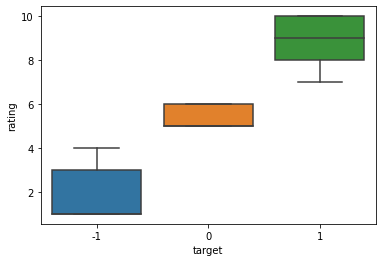

In [ ]:
# Importing the relevant packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting box plot of rating for each target class
sns.boxplot(x="target",y="rating",data=df)
plt.show()

**Observations:**
1. The box plots are plotted for all the three classes. 
2. Box plots typically show the summary statistics like median, 25%, 75%. The whiskers further denote the extremes of the values of the plot. 
3. All the three classes are pretty well separated using rating as the feature variable. Thus is quite obvious as the target class itself is created based on the mappong from the rating value

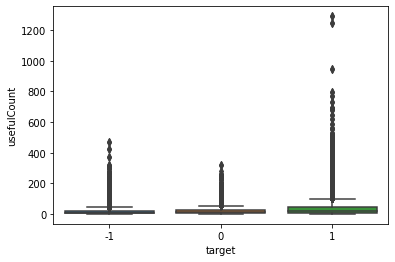

In [ ]:
# Plotting box plot of useful counts for each target class
sns.boxplot(x="target",y="usefulCount",data=df)
plt.show()

**Observations:**

The plots doesn't make much sense when Useful counts are taken into account and this clearly proves that it cannt be used as a determiner for the classes.

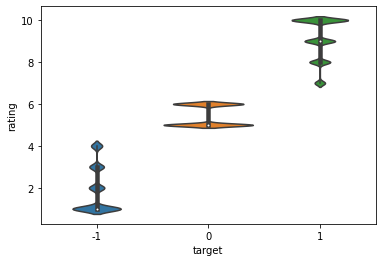

In [ ]:
# Plotting violin plot of ratings for each target class
sns.violinplot(x="target",y="rating",data=df)
plt.show()

**Observations:**
1. The violin plots shows the summary statistics like the median, lower quartile and upper quartile also shows how the data is distributed around them. 
2. Using rating again, we can clearly separate the classes for the reasons disussed above.

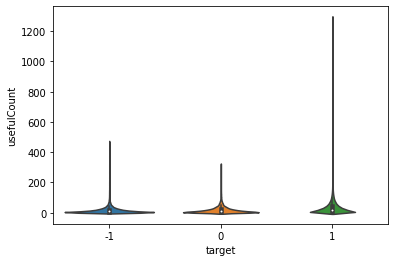

In [ ]:
# Plotting violin plot of useful counts for each target class
sns.violinplot(x="target",y="usefulCount",data=df)
plt.show()

**Observations:**

The plots doesn't make much sense when Useful counts are taken into account and this clearly proves that it cannt be used as a determiner for the classes.

In [ ]:
# Printing number of unique drug names 
drug_names = df['drugName'].unique()
print(len(drug_names))

3667


In [ ]:
# Printing number of unique conditions
conditions = df['condition'].unique()
print(len(conditions))

916


In [ ]:
# Printing number of unique ratings
ratings = df['rating'].unique()
print(len(ratings))

10


In [ ]:
# Printing the target distribution in all the records
df.target.value_counts()

 1    141560
-1     53256
 0     19053
Name: target, dtype: int64

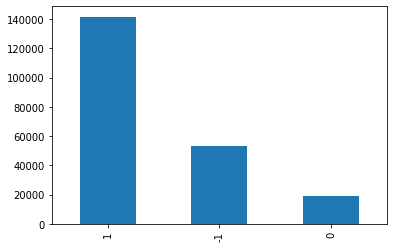

In [ ]:
df['target'].value_counts().plot(kind='bar')

In [ ]:
# Printing the rating distribution in all the records
df.rating.value_counts()

10.0    67682
9.0     36499
1.0     28769
8.0     24909
7.0     12470
5.0     10650
2.0      9203
3.0      8662
6.0      8403
4.0      6622
Name: rating, dtype: int64

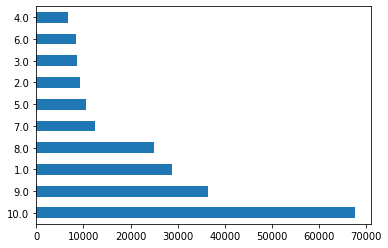

In [ ]:
# Plotting the rating distribution in all records
df['rating'].value_counts().plot(kind='barh')

In [ ]:
# Printing the drug name distribution in all the records
d = df.drugName.value_counts()
print(d)

Levonorgestrel                       4896
Etonogestrel                         4402
Ethinyl estradiol / norethindrone    3619
Nexplanon                            2892
Ethinyl estradiol / norgestimate     2682
                                     ... 
Prax                                    1
Limbrel 500                             1
Levo-T                                  1
Brinzolamide                            1
ProFe                                   1
Name: drugName, Length: 3667, dtype: int64


In [ ]:
# Printing the names of the top 10 drugs which have been reviewed
import itertools
d = d.items()
top10_drugNames = list(d)[:10]
print(top10_drugNames)


[('Levonorgestrel', 4896), ('Etonogestrel', 4402), ('Ethinyl estradiol / norethindrone', 3619), ('Nexplanon', 2892), ('Ethinyl estradiol / norgestimate', 2682), ('Ethinyl estradiol / levonorgestrel', 2400), ('Phentermine', 2077), ('Sertraline', 1859), ('Escitalopram', 1739), ('Mirena', 1673)]


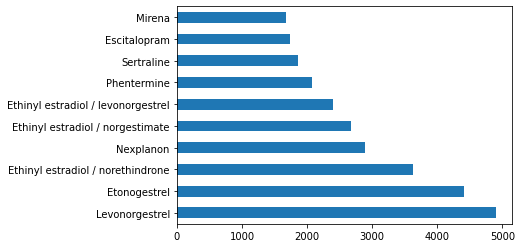

In [ ]:
# Plotting the top 10  drug names with reviews
df['drugName'].value_counts()[:10].plot(kind='barh')

In [ ]:
# Printing the condition distribution in all the records
c = df.condition.value_counts()
print(c)

Birth Control                                  38436
Depression                                     12164
Pain                                            8245
Anxiety                                         7812
Acne                                            7435
                                               ...  
Lyme Disease, Erythema Chronicum Migrans           1
Yellow Fever Prophylaxis                           1
Neurotic Depression                                1
79</span> users found this comment helpful.        1
Hepatitis B Prevention                             1
Name: condition, Length: 916, dtype: int64


In [ ]:
# Printing the names of the top 10 drugs which have been reviewed
import itertools
c = c.items()
top10_conditions = list(c)[:10]
print(top10_conditions)


[('Birth Control', 38436), ('Depression', 12164), ('Pain', 8245), ('Anxiety', 7812), ('Acne', 7435), ('Bipolar Disorde', 5604), ('Insomnia', 4904), ('Weight Loss', 4857), ('Obesity', 4757), ('ADHD', 4509)]


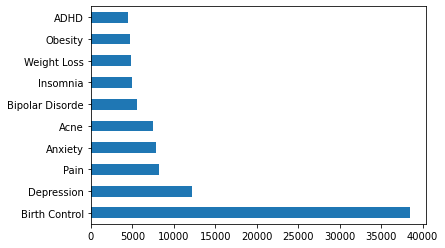

In [ ]:
# Plotting the top 10  conditions with reviews
df['condition'].value_counts()[:10].plot(kind='barh')

In [ ]:
# Printing drug names with the top 10 highest average ratings
df.groupby(['drugName'])['rating'].agg(['mean']).sort_values(by=['mean'], ascending=False)[:10]

,mean
drugName,
A + D Cracked Skin Relief,10.0
Glyset,10.0
Garlic,10.0
Generlac,10.0
Gengraf,10.0
Gentamicin,10.0
Gilotrif,10.0
Ginger,10.0
Glecaprevir / pibrentasvir,10.0


In [ ]:
# Printing drug names with the top 10 lowest average ratings
df.groupby(['drugName'])['rating'].agg(['mean']).sort_values(by=['mean'], ascending=True)[:10]

,mean
drugName,
Istodax,1.0
Topical Anesthetic Dental Gel,1.0
Azopt,1.0
Riociguat,1.0
Ritonavir,1.0
Bacitracin,1.0
Cometriq,1.0
Tums Smoothies,1.0
Nateglinide,1.0


In [ ]:
# Printing conditions with the top 10 highest average ratings
df.groupby(['condition'])['rating'].agg(['mean']).sort_values(by=['mean'], ascending=False)[:10]

,mean
condition,
Intermittent Explosive Disorde,10.0
Parkinsonism,10.0
Asystole,10.0
B12 Nutritional Deficiency,10.0
amilial Cold Autoinflammatory Syndrome,10.0
Bartonellosis,10.0
Blepharitis,10.0
Paroxysmal Supraventricular Tachycardia,10.0
Stomach Cance,10.0


In [ ]:
# Printing conditions with the top 10 lowest average ratings
df.groupby(['condition'])['rating'].agg(['mean']).sort_values(by=['mean'], ascending=True)[:10]

,mean
condition,
84</span> users found this comment helpful.,1.0
38</span> users found this comment helpful.,1.0
Thyroid Suppression Test,1.0
Scleroderma,1.0
Reversal of Nondepolarizing Muscle Relaxants,1.0
Radionuclide Myocardial Perfusion Study,1.0
Peripheral T-cell Lymphoma,1.0
AV Heart Block,1.0
CNS Magnetic Resonance Imaging,1.0


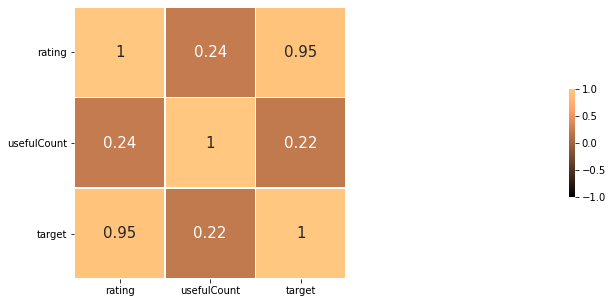

In [ ]:
# Computing th correlation matrix for the features with targets
corr_matrix = df[['rating','usefulCount','target']].corr()

f, ax = plt.subplots(figsize=(80,5))

# Generating the heatmap from the correlation matrix
heatmap = sns.heatmap(corr_matrix,
                      
                      square = True,
                      linewidths = .5,
                      cmap = 'copper',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 15})


ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
# Computing mean for ratings per target class
mean = df.groupby('target')['rating'].mean().rename("Mean")    

# Computing median for ratings per target class
median = df.groupby('target')['rating'].median().rename("Median")    

# Computing standard dev for ratings per target class
sd = df.groupby('target')['rating'].std().rename("Standard Deviation")    

# Displaying the mean, median, standard deviation for each target type in the form of a table
pd.concat([mean, median, sd], axis=1)   


,Mean,Median,Standard Deviation
target,,,
-1,1.871132,1.0,1.087951
0,5.441033,5.0,0.496524
1,9.125975,9.0,0.995275


In [ ]:
# Computing mean for usefulCount per rating point
mean = df.groupby('rating')['usefulCount'].mean().rename("Mean")    

# Computing median for usefulCount per rating point
median = df.groupby('rating')['usefulCount'].median().rename("Median")    

# Computing standard dev for usefulCount per rating point
sd = df.groupby('rating')['usefulCount'].std().rename("Standard Deviation")    

# Displaying the mean, median, standard deviation for each rating point in the form of a table
pd.concat([mean, median, sd], axis=1)   


,Mean,Median,Standard Deviation
rating,,,
1.0,15.710557,9,20.009177
2.0,16.414104,9,23.198877
3.0,16.194297,9,21.261997
4.0,16.603745,9,22.991952
5.0,17.271080,10,23.222609
6.0,20.000833,12,23.271513
7.0,23.283400,14,27.903044
8.0,29.395158,18,35.402994
9.0,33.895230,22,40.129941


In [ ]:
# Computing mean for usefulCount per target class
mean = df.groupby('target')['usefulCount'].mean().rename("Mean")    

# Computing median for usefulCount per target class
median = df.groupby('target')['usefulCount'].median().rename("Median")    

# Computing standard dev for usefulCount per target class
sd = df.groupby('target')['usefulCount'].std().rename("Standard Deviation")    

# Displaying the mean, median, standard deviation for each target class in the form of a table
pd.concat([mean, median, sd], axis=1)   


,Mean,Median,Standard Deviation
target,,,
-1,16.021875,9,21.181126
0,18.474991,11,23.283064
1,33.930461,21,40.728640


In [ ]:
# Importing relevant packages
from scipy.stats import skew 
import numpy as np  
import pylab as p  

k = df['target'].unique().tolist()   # Storing the unique target class values

# Printing the skewness values for all target classes w.r.t. rating attribute
for i in k:
  x = df[df.target == i]['rating']
  print( '\nSkewness for class=' +str(i) +' is ' + str(skew(x)))


Skewness for class=1 is -0.7900768275082474

Skewness for class=0 is 0.2375259625819329

Skewness for class=-1 is 0.8363107918752557


**Observations:**
1. For target=0, -1, it is positively skewed.
2. For target=1, it is negatively skewed.

In [ ]:
# Printing the skewness values for all target classes w.r.t. Useful Count atribute
for i in k:
  x = df[df.target == i]['usefulCount']
  print( '\nSkewness for class=' +str(i) +' is ' + str(skew(x)))


Skewness for class=1 is 4.229500160680433

Skewness for class=0 is 3.2493962751412906

Skewness for class=-1 is 4.4238472985295605


**Observations:**
1. For all the target classes, it is positively skewed. 
2. The skewness is maximum for target = -1


target
-1    AxesSubplot(0.125,0.125;0.775x0.755)
 0    AxesSubplot(0.125,0.125;0.775x0.755)
 1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating, dtype: object

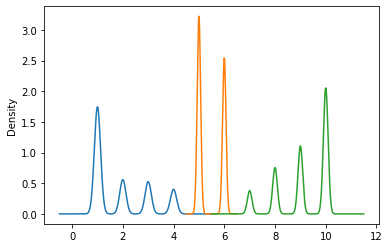

In [ ]:
# Plotting density plots of the ratings for different target classes
df.groupby('target')['rating'].plot.kde()

target
-1    AxesSubplot(0.125,0.125;0.775x0.755)
 0    AxesSubplot(0.125,0.125;0.775x0.755)
 1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: usefulCount, dtype: object

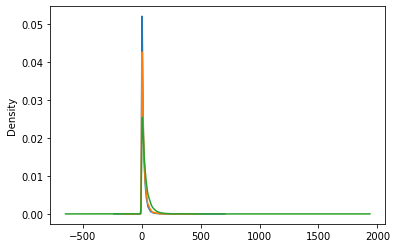

In [ ]:
# Plotting density plots of the Useful Counts for different target classes
df.groupby('target')['usefulCount'].plot.kde()

rating
1.0     AxesSubplot(0.125,0.125;0.775x0.755)
2.0     AxesSubplot(0.125,0.125;0.775x0.755)
3.0     AxesSubplot(0.125,0.125;0.775x0.755)
4.0     AxesSubplot(0.125,0.125;0.775x0.755)
5.0     AxesSubplot(0.125,0.125;0.775x0.755)
6.0     AxesSubplot(0.125,0.125;0.775x0.755)
7.0     AxesSubplot(0.125,0.125;0.775x0.755)
8.0     AxesSubplot(0.125,0.125;0.775x0.755)
9.0     AxesSubplot(0.125,0.125;0.775x0.755)
10.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: usefulCount, dtype: object

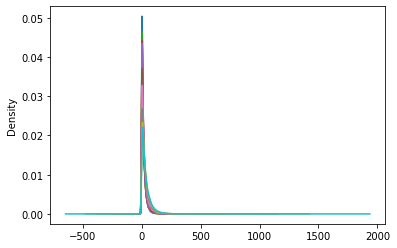

In [ ]:
# Plotting density plots of the Useful Counts for different ratings
df.groupby('rating')['usefulCount'].plot.kde()